In [2]:
%pylab inline
import seaborn as sns;sns.set_style('darkgrid')
import pandas as pd
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
sns.set_context('poster',font_scale=1.4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set_palette('colorblind')

In [4]:
hex_y1 = np.load('hex_y1_delta_xips.npy')
hex_y10 = np.load('hex_y10_delta_xips.npy')
random_y1 = np.load('random_y1_delta_xips.npy')
random_y10 = np.load('random_y10_delta_xips.npy')
spiral_y1 = np.load('spiral_y1_delta_xips.npy')
spiral_y10 = np.load('spiral_y10_delta_xips.npy')
r = np.load('r.npy')

In [5]:
reqs = np.loadtxt('./rho_requirements.txt')

In [32]:
len(np.load('hex_rot_y10.npy'))

24

In [11]:
colors = sns.color_palette('colorblind')

In [10]:
sns.set_style('darkgrid')

Text(0,0.5,'$\\delta \\xi_+$')

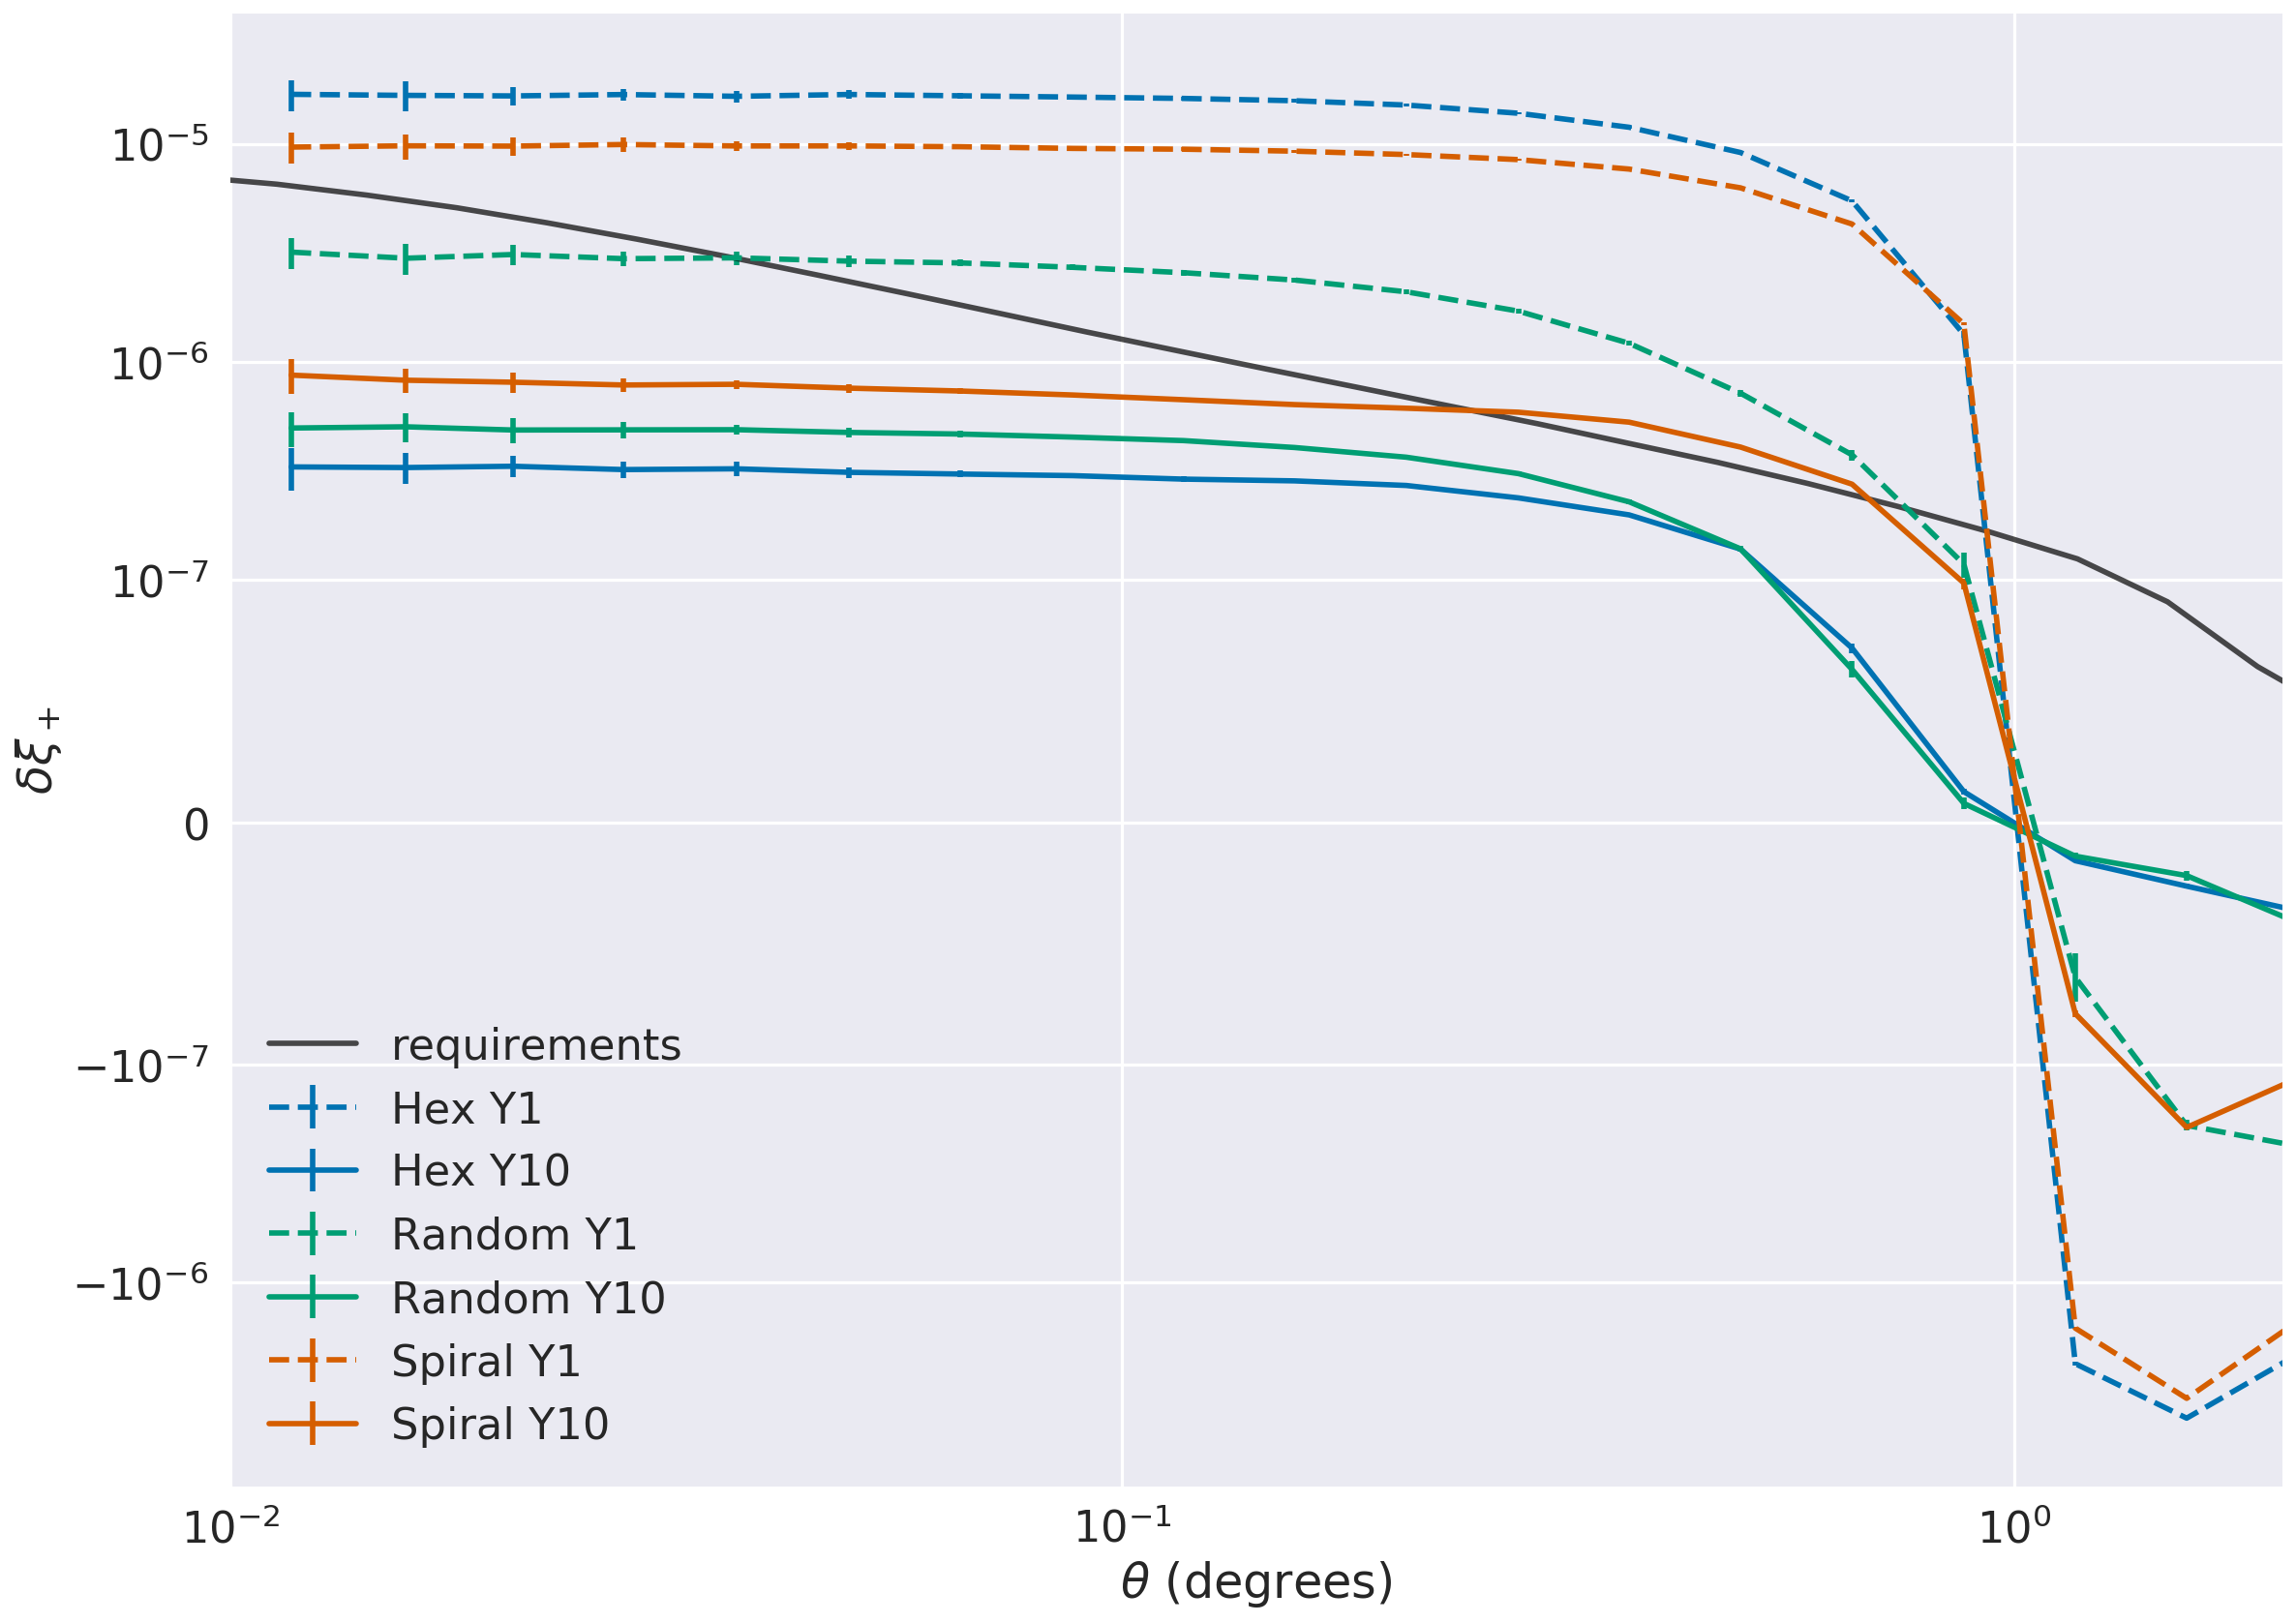

In [19]:
plt.errorbar(r,np.mean(hex_y1,axis=0), np.std(hex_y1,axis=0), linestyle='--', color=colors[0], label='Hex Y1')
plt.errorbar(r,np.mean(hex_y10,axis=0), np.std(hex_y10,axis=0), color=colors[0], label='Hex Y10')

plt.errorbar(r,np.mean(random_y1,axis=0), np.std(random_y1,axis=0), linestyle='--', color=colors[1], label='Random Y1')
plt.errorbar(r,np.mean(random_y10,axis=0), np.std(random_y10,axis=0), color=colors[1], label='Random Y10')

plt.errorbar(r,np.mean(spiral_y1,axis=0), np.std(spiral_y1,axis=0), linestyle='--', color=colors[2], label='Spiral Y1')
plt.errorbar(r,np.mean(spiral_y10,axis=0), np.std(spiral_y10,axis=0), color=colors[2], label='Spiral Y10')


plt.plot(reqs[:,0], reqs[:,1], color='k', label='requirements', alpha=0.7)
plt.legend()

#plt.errorbar(r, np.mean(hex_))
plt.xscale('log')
plt.yscale('symlog',linthreshy=1e-7)
plt.xlim((0.01,2))
plt.xlabel(r'$\theta $ (degrees)')
plt.ylabel(r'$\delta \xi_+$')

## Table

In [ ]:
import scipy.optimize as opt
def fit(xi1,xi2,error, x0=1):

    def chisqfunc(m):
        model = m*xi2
        chisq = numpy.sum(((xi1 - model)/error)**2)
        return chisq

    result = opt.minimize(chisqfunc, x0)
    return result

In [ ]:
df = pd.DataFrame(columns=['Y1','Y10'], index=['Hex','Random','Spiral', 'ALT_Sched', 'FeatureBaseline', 'ALT_SchedRolling', 'FeatureBaselineRolling'])
df['Y1']['Hex'] = df['Y10']['Hex'] = 1
df['Y1']['Spiral'] = fit(SpiralVisitY1.delta_xip, HexVisitY1.delta_xip, SpiralVisitY1.delta_xip_sigma).x[0]
df['Y1']['ALT_Sched'] = fit(ALT_SchedY1.delta_xip, HexVisitY1.delta_xip, ALT_SchedY1.delta_xip_sigma).x[0]
df['Y1']['Random'] = fit(RandomVisitY1.delta_xip, HexVisitY1.delta_xip, RandomVisitY1.delta_xip_sigma).x[0]
df['Y1']['FeatureBaseline'] = fit(FeatureBaselineY1.delta_xip, HexVisitY1.delta_xip, FeatureBaselineY1.delta_xip_sigma).x[0]
df['Y1']['ALT_SchedRolling'] = fit(ALT_SchedRollingY1.delta_xip[1:], HexVisitY1.delta_xip[1:], ALT_SchedRollingY1.delta_xip_sigma[1:]).x[0]
df['Y1']['FeatureBaselineRolling'] = fit(FeatureBaselineRollingY1.delta_xip, HexVisitY1.delta_xip, FeatureBaselineRollingY1.delta_xip_sigma).x[0]
df['Y10']['Spiral'] = fit(SpiralVisitY10.delta_xip, HexVisitY10.delta_xip, SpiralVisitY10.delta_xip_sigma).x[0]
df['Y10']['Random'] = fit(RandomVisitY10.delta_xip, HexVisitY10.delta_xip, RandomVisitY10.delta_xip_sigma).x[0]
df['Y10']['ALT_Sched'] = fit(ALT_SchedY10.delta_xip, HexVisitY10.delta_xip, ALT_SchedY10.delta_xip_sigma).x[0]
df['Y10']['FeatureBaseline'] = fit(abs(FeatureBaselineY10.delta_xip), abs(HexVisitY10.delta_xip), abs(FeatureBaselineY10.delta_xip_sigma)).x[0]
df['Y10']['FeatureBaselineRolling'] = ''
df['Y10']['ALT_SchedRolling'] = ''

In [ ]:
df